In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
import matplotlib.dates as mdates

In [12]:
dataset = pd.read_excel('grocery_price.xlsx', index_col=None)
# transform data to from row to column
dataset = dataset.T
dataset.columns = dataset.iloc[0]
dataset = dataset.drop(dataset.index[0])
# add new column to dataset, average of all column 
dataset['Average'] = round(dataset.mean(axis=1),2)
# remove column 2
dataset = dataset.drop(dataset.columns[0:3], axis=1)


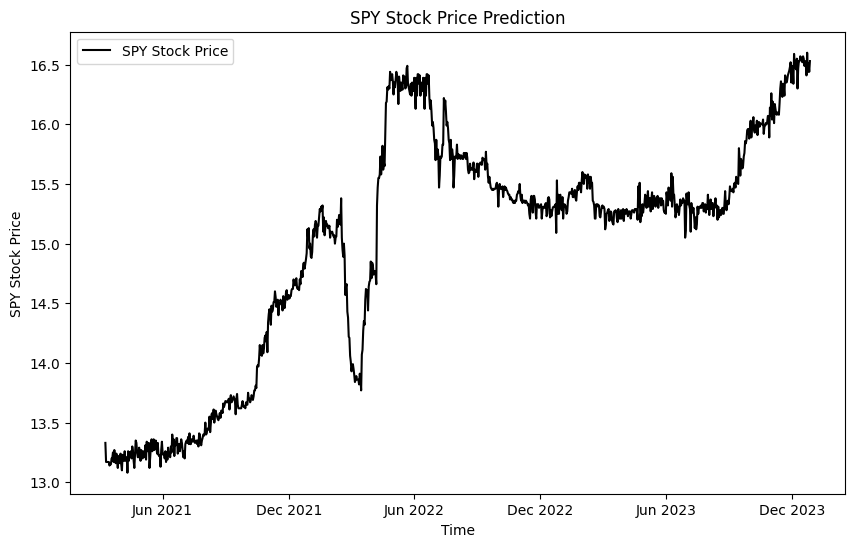

In [13]:
# Prepare dates for the predicted stock prices
date_range = pd.date_range(start='2021-03-10', periods=len(dataset), freq='D')  # 'B' for business day frequency

# Visualizing Results with Month and Year on X-axis
plt.figure(figsize=(10, 6))
plt.plot(date_range, dataset['Average'], color='black', label='SPY Stock Price')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Show tick marks for every 3 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format x-axis labels as 'Jan 2023', 'Feb 2023', etc.
plt.title('SPY Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('SPY Stock Price')
plt.legend()
plt.show()